# Proyecto 200Eng - Black list

Transferencia a servidor



### Importa dependencias

In [1]:
# pip install pymysql

In [2]:
#importa dependencias
from pymysql import connect
import pandas as pd
from datetime import datetime, date, time, timedelta
from time import sleep
from textwrap import dedent
import matplotlib.pyplot as plt
import seaborn as sns
from millify import millify, prettify
import os
from sqlalchemy import create_engine
import plotly.express as px
import random


In [3]:
round(random.random(), 2)

0.95

In [4]:
datetime.now()

datetime.datetime(2024, 9, 27, 19, 55, 46, 317815)

In [5]:
datetime.now().hour

19

In [6]:
date(2024, 8, 18) == datetime(2024, 8, 18, 0, 0, 0)

False

In [7]:
datetime.now() - timedelta(days=30)

datetime.datetime(2024, 8, 28, 19, 55, 46, 529763)

In [8]:
start = datetime.now()
sleep(3)
end = datetime.now()
elapsed = end - start
print(str(elapsed).split(':'))

['0', '00', '03.000651']


### Conexión con todos los marcadores

In [17]:
# lista de marcadores
url_marcadores = ['83.138.55.125',
              '193.219.97.92',
              '193.219.97.90',
              '83.138.55.115',
              '94.177.9.69',
              '83.138.55.163',
              ]

ind_marcadores = [1, 2, 3, 4, 6, 7]

url_backup = '86.106.183.70'

database_backup = ['marcador1',
                   'marcador2',
                   'marcador3',
                   'marcador4',
                   'marcador6',
                   'marcador7']

In [11]:
user = 'carlosai'
password = 'OKJmBUIFnh'
port = '3306'
database = 'mbilling'

In [12]:
# creación de un diccionario de bd para cada marcadro con pymysql

def connect_to_db():
    bd = {}
    cursores = {}

    for i, ind in enumerate(ind_marcadores):
        # crea la conexión
        try:    
            bd[f'marcador_{ind}'] = connect(host = url_marcadores[i],
                                            user=user,
                                            passwd=password,
                                            database=database,
                                            )

            # crea el cursor
            cursores[f'cursor_marcador_{ind}'] = bd[f'marcador_{ind}'].cursor()
            print(f'Conexión exitosa a marcador_{ind} con ip {url_marcadores[ind]}')
        except:
            print(f'Error conectando a marcador_{ind} con ip {url_marcadores[i]}')
            continue
    return bd, cursores

bd, cursores = connect_to_db()

bd


Conexión exitosa a marcador_1 con ip 193.219.97.92
Conexión exitosa a marcador_2 con ip 193.219.97.90
Conexión exitosa a marcador_3 con ip 83.138.55.115
Conexión exitosa a marcador_4 con ip 94.177.9.69
Error conectando a marcador_6 con ip 94.177.9.69
Error conectando a marcador_7 con ip 83.138.55.163


{'marcador_1': <pymysql.connections.Connection at 0x131750f50>,
 'marcador_2': <pymysql.connections.Connection at 0x131a2a2d0>,
 'marcador_3': <pymysql.connections.Connection at 0x10e409f70>,
 'marcador_4': <pymysql.connections.Connection at 0x131b1c650>,
 'marcador_7': <pymysql.connections.Connection at 0x130805d60>}

In [19]:
# creación de un diccionario de bd para cada marcadro con pymysql

def connect_to_db_backup():
    bd = {}
    cursores = {}

    for dbase in database_backup:
        try:    
            # crea la conexión
            bd[f'{dbase}'] = connect(host = url_backup,
                                            user=user,
                                            passwd=password,
                                            database=dbase,
                                            )

            # crea el cursor
            cursores[f'cursor_{dbase}'] = bd[f'{dbase}'].cursor()
            print(f'Conexión exitosa a base de datos {dbase} con ip {url_backup}')
        except:
            print(f'Error conectando a base de datos {dbase} con ip {url_backup}')
            continue
    return bd, cursores

bd_backup, cursores_backup = connect_to_db_backup()

bd_backup


Conexión exitosa a base de datos marcador1 con ip 86.106.183.70
Conexión exitosa a base de datos marcador2 con ip 86.106.183.70
Conexión exitosa a base de datos marcador3 con ip 86.106.183.70
Conexión exitosa a base de datos marcador4 con ip 86.106.183.70
Conexión exitosa a base de datos marcador6 con ip 86.106.183.70
Conexión exitosa a base de datos marcador7 con ip 86.106.183.70


{'marcador1': <pymysql.connections.Connection at 0x133397ce0>,
 'marcador2': <pymysql.connections.Connection at 0x133397ec0>,
 'marcador3': <pymysql.connections.Connection at 0x133395070>,
 'marcador4': <pymysql.connections.Connection at 0x1333956a0>,
 'marcador6': <pymysql.connections.Connection at 0x1333942f0>,
 'marcador7': <pymysql.connections.Connection at 0x133394740>}

In [62]:
cursores_backup

{'cursor_marcador1': <pymysql.cursors.Cursor at 0x133397cb0>,
 'cursor_marcador2': <pymysql.cursors.Cursor at 0x133396b10>,
 'cursor_marcador3': <pymysql.cursors.Cursor at 0x133396360>,
 'cursor_marcador4': <pymysql.cursors.Cursor at 0x1333957c0>,
 'cursor_marcador6': <pymysql.cursors.Cursor at 0x133394260>,
 'cursor_marcador7': <pymysql.cursors.Cursor at 0x1333949e0>}

In [22]:
# creación de un diccionario de bd para cada marcadro con sqlalchemy

bd_sqlalch = {}

for dbase in database_backup:
    # crea la conexión
    cnx = create_engine(f'mysql+pymysql://{user}:{password}@{url_backup}:{port}/{dbase}')
    bd_sqlalch[f'{dbase}'] = cnx.connect()


bd_sqlalch

{'marcador1': <sqlalchemy.engine.base.Connection at 0x133470ce0>,
 'marcador2': <sqlalchemy.engine.base.Connection at 0x1334708f0>,
 'marcador3': <sqlalchemy.engine.base.Connection at 0x1310810a0>,
 'marcador4': <sqlalchemy.engine.base.Connection at 0x133471f40>,
 'marcador6': <sqlalchemy.engine.base.Connection at 0x133472630>,
 'marcador7': <sqlalchemy.engine.base.Connection at 0x133472c30>}

### Extracción de datos

In [23]:
# rango de 1 mes
fecha = datetime(2023, 9, 30)
dias = 15
fecha_menos_30 = (fecha - timedelta(days=dias)).strftime('%Y-%m-%d')
start = '2023-01-12'

if start > fecha_menos_30:
    fecha_inicio = start
else:
    fecha_inicio = fecha_menos_30

fecha = fecha.strftime('%Y-%m-%d')

print(f'Fecha de inicio: {fecha_inicio}\nFecha de final: {fecha}')


Fecha de inicio: 2023-09-15
Fecha de final: 2023-09-30


In [24]:
# define la consulta (query)
query = dedent(f"""
        SELECT starttime, calledstation, real_sessiontime
        FROM pkg_cdr
        WHERE starttime BETWEEN '{fecha_inicio}' AND '{fecha}';
        """)

print(f'Query a correr:\n{query}')


Query a correr:

SELECT starttime, calledstation, real_sessiontime
FROM pkg_cdr
WHERE starttime BETWEEN '2023-09-15' AND '2023-09-30';



In [25]:
# crea una función para devolver cada df con pymysql
def get_df(bd, bd_name):
    df_temp = pd.read_sql(query, bd)
    df_temp['bd'] = bd_name

    return df_temp

In [26]:
# crea una función para devolver cada df con sqlalchemy
def get_df_sqlalch(bd, bd_name):
    sql_query = pd.read_sql_query(query, bd)
    df_temp = pd.DataFrame(sql_query)
    df_temp['bd'] = bd_name

    return df_temp

In [27]:
#lista de df
# df_list = [get_df(bd[f'marcador_{ind}'], f'marcador_{ind}') for ind in ind_marcadores]

df_list = []
for dbase in database_backup:
    query_ok = False
    conn_ok = False
    print(f'Consultando {dbase}...')
    while not query_ok:
        try:
            df_list.append(get_df(bd_backup[f'{dbase}'], f'{dbase}'))
            query_ok = True
            print(f'Consulta _{dbase} OK')
        except:
            print(f'Consulta {dbase} con ERROR')
            while not conn_ok:
                try:
                    bd_backup, _ = connect_to_db_backup()
                    conn_ok = True
                    print(f'Nueva conexión bd OK')
                except:
                    print(f'Nueva conexión bd con ERROR')
                    sleep(5)
        


Consultando marcador1...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador1 OK
Consultando marcador2...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador2 OK
Consultando marcador3...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador3 OK
Consultando marcador4...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador4 OK
Consultando marcador6...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador6 OK
Consultando marcador7...


/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/2795151752.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_temp = pd.read_sql(query, bd)


Consulta _marcador7 OK


In [28]:
df_list[2]

,starttime,calledstation,real_sessiontime,bd
0,2023-09-15 00:00:06,18555025673,410,marcador3
1,2023-09-15 00:00:06,18004496842,3440,marcador3
2,2023-09-15 00:00:07,18334083326,52,marcador3
3,2023-09-15 00:00:14,18007018101,7,marcador3
4,2023-09-15 00:00:14,18889606462,174,marcador3
...,...,...,...,...
514586,2023-09-29 23:59:55,18775003282,102,marcador3
514587,2023-09-29 23:59:55,18884560246,273,marcador3
514588,2023-09-29 23:59:55,18554269143,2398,marcador3
514589,2023-09-29 23:59:56,18777295099,4,marcador3


In [29]:
df = pd.concat(df_list, axis=0)
df

/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/1100062364.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(df_list, axis=0)


,starttime,calledstation,real_sessiontime,bd
0,2023-09-15 00:00:02,18773922949,572,marcador1
1,2023-09-15 00:00:03,18884853333,128,marcador1
2,2023-09-15 00:00:03,18886977188,147,marcador1
3,2023-09-15 00:00:04,18005517674,432,marcador1
4,2023-09-15 00:00:05,18002640637,104,marcador1
...,...,...,...,...
504657,2023-09-29 23:59:55,18553625433,322,marcador4
504658,2023-09-29 23:59:57,18004239440,14,marcador4
504659,2023-09-29 23:59:57,18007341248,3600,marcador4
504660,2023-09-29 23:59:59,18776089111,9,marcador4


In [32]:
df['weekday'] = df.starttime.dt.weekday
df['hour'] = df.starttime.dt.hour
df

,starttime,calledstation,real_sessiontime,bd,weekday,hour
0,2023-09-15 00:00:02,18773922949,572,marcador1,4,0
1,2023-09-15 00:00:03,18884853333,128,marcador1,4,0
2,2023-09-15 00:00:03,18886977188,147,marcador1,4,0
3,2023-09-15 00:00:04,18005517674,432,marcador1,4,0
4,2023-09-15 00:00:05,18002640637,104,marcador1,4,0
...,...,...,...,...,...,...
504657,2023-09-29 23:59:55,18553625433,322,marcador4,4,23
504658,2023-09-29 23:59:57,18004239440,14,marcador4,4,23
504659,2023-09-29 23:59:57,18007341248,3600,marcador4,4,23
504660,2023-09-29 23:59:59,18776089111,9,marcador4,4,23


In [33]:
df = df.set_index('starttime')
df = df.sort_index()
df

,calledstation,real_sessiontime,bd,weekday,hour
starttime,,,,,
2023-09-15 00:00:00,18883259310,13,marcador2,4,0
2023-09-15 00:00:02,18773922949,572,marcador1,4,0
2023-09-15 00:00:03,18884853333,128,marcador1,4,0
2023-09-15 00:00:03,18886977188,147,marcador1,4,0
2023-09-15 00:00:04,18005517674,432,marcador1,4,0
...,...,...,...,...,...
2023-09-29 23:59:59,18775403649,89,marcador1,4,23
2023-09-29 23:59:59,18007428585,109,marcador1,4,23
2023-09-29 23:59:59,18776089111,9,marcador4,4,23


In [40]:
# memoria antes de convertir datos `object` a `category``
prefixes = ['kB', 'MB', 'GB']
print(millify(df.memory_usage(deep=True).sum(), prefixes=prefixes))


69MB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190350 entries, 2023-09-15 00:00:00 to 2023-09-29 23:59:59
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   calledstation     object
 1   real_sessiontime  object
 2   bd                object
 3   weekday           int32 
 4   hour              int32 
dtypes: int32(2), object(3)
memory usage: 83.6+ MB


In [41]:
df.calledstation = df.calledstation.astype('category')
df.real_sessiontime = df.real_sessiontime.astype('int')
df.bd = df.bd.astype('category')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190350 entries, 2023-09-15 00:00:00 to 2023-09-29 23:59:59
Data columns (total 5 columns):
 #   Column            Dtype   
---  ------            -----   
 0   calledstation     category
 1   real_sessiontime  int64   
 2   bd                category
 3   weekday           int32   
 4   hour              int32   
dtypes: category(2), int32(2), int64(1)
memory usage: 63.0 MB


In [43]:
# memoria antes de convertir datos `object` a `category``
prefixes = ['kB', 'MB', 'GB']
print(millify(df.memory_usage(deep=True).sum(), prefixes=prefixes))

69MB


In [44]:
df.index.nunique()

617866

In [45]:
df.shape

(2190350, 5)

In [46]:
df.nunique().sort_values(ascending=False)

calledstation       53545
real_sessiontime     3683
hour                   15
weekday                 7
bd                      4
dtype: int64

In [47]:
df_dest_calls = df.calledstation.value_counts().to_frame()
df_dest_calls = df_dest_calls.rename(columns={'count': 'num_llamadas'})
df_dest_calls

,num_llamadas
calledstation,
18007976257,85
18884730868,84
18443157460,83
18002763872,82
18666359077,82
...,...
18002810540,1
18775826893,1
18882133797,1


### Análisis de información

In [48]:
df_dest = df.groupby(['calledstation']).real_sessiontime.sum().sort_values(ascending=False).to_frame()
df_dest

/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/396288627.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dest = df.groupby(['calledstation']).real_sessiontime.sum().sort_values(ascending=False).to_frame()


,real_sessiontime
calledstation,
18443103947,198934
18009828522,196620
18003322415,191040
18775142569,188852
18884905457,187213
...,...
18778142461,3
18332893664,2
18449861777,2


In [49]:
df_dest = df_dest.join(df_dest_calls, on='calledstation')
df_dest

,real_sessiontime,num_llamadas
calledstation,,
18443103947,198934,82
18009828522,196620,76
18003322415,191040,80
18775142569,188852,76
18884905457,187213,82
...,...,...
18778142461,3,1
18332893664,2,1
18449861777,2,1


In [50]:
df_dest['dur_prom'] = df_dest.real_sessiontime / df_dest.num_llamadas
df_dest

,real_sessiontime,num_llamadas,dur_prom
calledstation,,,
18443103947,198934,82,2426.024390
18009828522,196620,76,2587.105263
18003322415,191040,80,2388.000000
18775142569,188852,76,2484.894737
18884905457,187213,82,2283.085366
...,...,...,...
18778142461,3,1,3.000000
18332893664,2,1,2.000000
18449861777,2,1,2.000000


In [51]:
df_dest.sort_values(by='num_llamadas', ascending=False)

,real_sessiontime,num_llamadas,dur_prom
calledstation,,,
18007976257,8486,85,99.835294
18884730868,38277,84,455.678571
18443157460,23197,83,279.481928
18443103947,198934,82,2426.024390
18774683504,179683,82,2191.256098
...,...,...,...
18006083395,13,1,13.000000
18447894039,13,1,13.000000
18442181301,13,1,13.000000


In [52]:
def P5(x):
    return x.quantile(0.05)

def P25(x):
    return x.quantile(0.25)

def P50(x):
    return x.quantile(0.5)

def P75(x):
    return x.quantile(0.75)

def P95(x):
    return x.quantile(0.95)

In [127]:
# %%time
# df_dest_stats = df.groupby('calledstation').aggregate({'real_sessiontime': ['max', 'min', P25, P50, P75]})


In [128]:
# df_dest_stats

In [129]:
# df_dest_stats.columns = df_dest_stats.columns.map('_'.join).str.strip('_')
# df_dest_stats

In [130]:
# df_dest = df_dest.join(df_dest_stats, on='calledstation')
# df_dest

In [53]:
def ratio(df_func, last_n=2):
    df_temp = df_func.tail(last_n)
    ratio = df_temp['real_sessiontime'].std() / df_temp['real_sessiontime'].mean()
    return ratio

In [54]:
df_dest_ratio = df.groupby('calledstation').apply(ratio).to_frame()
df_dest_ratio = df_dest_ratio.rename(columns={0:'flat_ratio'})
df_dest_ratio

/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/3051033278.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_dest_ratio = df.groupby('calledstation').apply(ratio).to_frame()
/var/folders/4x/0wzldd8s3md_vc0bvz7ndzth0000gn/T/ipykernel_35951/3051033278.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_dest_ratio = df.groupby('calledstation').apply(ratio).to_frame()


,flat_ratio
calledstation,
18002001956,0.013262
18002002000,0.000000
18002002599,0.208654
18002002665,0.015491
18002003111,0.026683
...,...
18889995252,0.690213
18889996569,0.008468
18889999101,0.013176


In [55]:
df_dest = df_dest.join(df_dest_ratio, on='calledstation')
df_dest

,real_sessiontime,num_llamadas,dur_prom,flat_ratio
calledstation,,,,
18443103947,198934,82,2426.024390,0.202349
18009828522,196620,76,2587.105263,0.310040
18003322415,191040,80,2388.000000,0.053881
18775142569,188852,76,2484.894737,0.000393
18884905457,187213,82,2283.085366,0.991719
...,...,...,...,...
18778142461,3,1,3.000000,NaN
18332893664,2,1,2.000000,NaN
18449861777,2,1,2.000000,NaN


In [56]:
umbral = 0.005
df_dest_flat = df_dest[df_dest.flat_ratio <= umbral].sort_values(by='num_llamadas', ascending=False)
df_dest_flat

,real_sessiontime,num_llamadas,dur_prom,flat_ratio
calledstation,,,,
18884730868,38277,84,455.678571,0.001097
18666359077,32752,82,399.414634,0.003536
18448165971,14681,81,181.246914,0.002800
18884441424,105573,80,1319.662500,0.004102
18442406385,18444,79,233.468354,0.004882
...,...,...,...,...
18447361549,602,2,301.000000,0.004698
18667271694,600,2,300.000000,0.000000
18554054996,600,2,300.000000,0.000000


In [57]:
index_lm = df_dest_flat.index
index_lm

CategoricalIndex(['18884730868', '18666359077', '18448165971', '18884441424',
                  '18442406385', '18882320403', '18006786575', '18333343339',
                  '18775142569', '18668865113',
                  ...
                  '18448743833', '18663937447', '18772197340', '18007154836',
                  '18663039675', '18447361549', '18667271694', '18554054996',
                  '18448634621', '18444786683'],
                 categories=['18002001956', '18002002000', '18002002599', '18002002665', ..., '18889996569', '18889999101', '18889999353', '18889999520'], ordered=False, dtype='category', name='calledstation', length=9230)

In [58]:
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2024-09-27 20:20:53'

In [59]:
block_numbers = ''
ind = 0
num_block = 10


while ind < num_block:
    block_numbers += "("
    block_numbers += index_lm[ind]
    block_numbers += ","
    block_numbers += f"'Número agregado por Carlos Gorricho desde script the Python el {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}'"
    if ind < num_block - 1:
        block_numbers += "),\n"
    else:
        block_numbers += ")"

    ind += 1


print(block_numbers)


(18884730868,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18666359077,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18448165971,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18884441424,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18442406385,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18882320403,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18006786575,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18333343339,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18775142569,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18668865113,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00')


In [66]:
# define la consulta (query)
add_query = dedent(f"""INSERT INTO `pkg_campaign_restrict_phone` (number, description) VALUES\n{block_numbers};""")

print(f'Query a correr:\n{add_query}')


Query a correr:
INSERT INTO `pkg_campaign_restrict_phone` (number, description) VALUES
(18884730868,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18666359077,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18448165971,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18884441424,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18442406385,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18882320403,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18006786575,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18333343339,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18775142569,'Número agregado por Carlos Gorricho desde script the Python el 2024-09-27 20:21:00'),
(18668865113,

In [68]:
for key in cursores_backup.keys():
    print(key)

cursor_marcador1
cursor_marcador2
cursor_marcador3
cursor_marcador4
cursor_marcador6
cursor_marcador7


In [64]:
cursores_backup

{'cursor_marcador1': <pymysql.cursors.Cursor at 0x133397cb0>,
 'cursor_marcador2': <pymysql.cursors.Cursor at 0x133396b10>,
 'cursor_marcador3': <pymysql.cursors.Cursor at 0x133396360>,
 'cursor_marcador4': <pymysql.cursors.Cursor at 0x1333957c0>,
 'cursor_marcador6': <pymysql.cursors.Cursor at 0x133394260>,
 'cursor_marcador7': <pymysql.cursors.Cursor at 0x1333949e0>}

In [71]:
# ejecuta consulta en todos los marcadores
for key in cursores_backup.keys():
    cursores_backup[key].execute(add_query)
    print(f'Ejectando consulta en {key} - Agregadas {cursores_backup[key].rowcount} filas')
    


Ejectando consulta en cursor_marcador1 - Agregadas 10 filas
Ejectando consulta en cursor_marcador2 - Agregadas 10 filas
Ejectando consulta en cursor_marcador3 - Agregadas 10 filas
Ejectando consulta en cursor_marcador4 - Agregadas 10 filas
Ejectando consulta en cursor_marcador6 - Agregadas 10 filas
Ejectando consulta en cursor_marcador7 - Agregadas 10 filas


In [72]:
# compromete los cambios en todos los marcadores
for base in bd_backup.keys():
    bd_backup[base].commit()
    print(f'Condirmando cambios en {base}')
    

Condirmando cambios en marcador1
Condirmando cambios en marcador2
Condirmando cambios en marcador3
Condirmando cambios en marcador4
Condirmando cambios en marcador6
Condirmando cambios en marcador7


### Visualizaciones

#### Flatliners

In [73]:
df

,calledstation,real_sessiontime,bd,weekday,hour
starttime,,,,,
2023-09-15 00:00:00,18883259310,13,marcador2,4,0
2023-09-15 00:00:02,18773922949,572,marcador1,4,0
2023-09-15 00:00:03,18884853333,128,marcador1,4,0
2023-09-15 00:00:03,18886977188,147,marcador1,4,0
2023-09-15 00:00:04,18005517674,432,marcador1,4,0
...,...,...,...,...,...
2023-09-29 23:59:59,18775403649,89,marcador1,4,23
2023-09-29 23:59:59,18007428585,109,marcador1,4,23
2023-09-29 23:59:59,18776089111,9,marcador4,4,23


In [74]:
index_lm = df_dest_flat.index
index_lm

CategoricalIndex(['18884730868', '18666359077', '18448165971', '18884441424',
                  '18442406385', '18882320403', '18006786575', '18333343339',
                  '18775142569', '18668865113',
                  ...
                  '18448743833', '18663937447', '18772197340', '18007154836',
                  '18663039675', '18447361549', '18667271694', '18554054996',
                  '18448634621', '18444786683'],
                 categories=['18002001956', '18002002000', '18002002599', '18002002665', ..., '18889996569', '18889999101', '18889999353', '18889999520'], ordered=False, dtype='category', name='calledstation', length=9230)

In [75]:
df_dest_flat.flat_ratio.mean()

0.0014660738556393652

In [76]:
rows=5
cols=5
indice=0
i=0
index_lm[i+indice*rows*cols]

'18884730868'

In [77]:
df_dest.index[i+indice*rows*cols]

'18443103947'

In [78]:
def plot_flat_ts(df, df_graf, ind=0):    
    rows = 5
    cols = 5
    indice = ind
    fix, ax = plt.subplots(rows,cols,
                        figsize=(20,rows * 4),
                        sharey=True,
                        sharex=True,
                        squeeze=False)

    for i in range(rows * cols):
        ax[i//5, i%5].plot(df[df['calledstation']==df_graf.index[i+indice*rows*cols]].real_sessiontime)
        ax[i//5, i%5].set_title(f"{i+1+indice*rows*cols}. {df_graf.index[i+indice*rows*cols]} ({df_graf.loc[df_graf.index[i+indice*rows*cols], 'flat_ratio']:.3f})\n")
        ax[i//5, i%5].set_xticklabels([])

    plt.show()


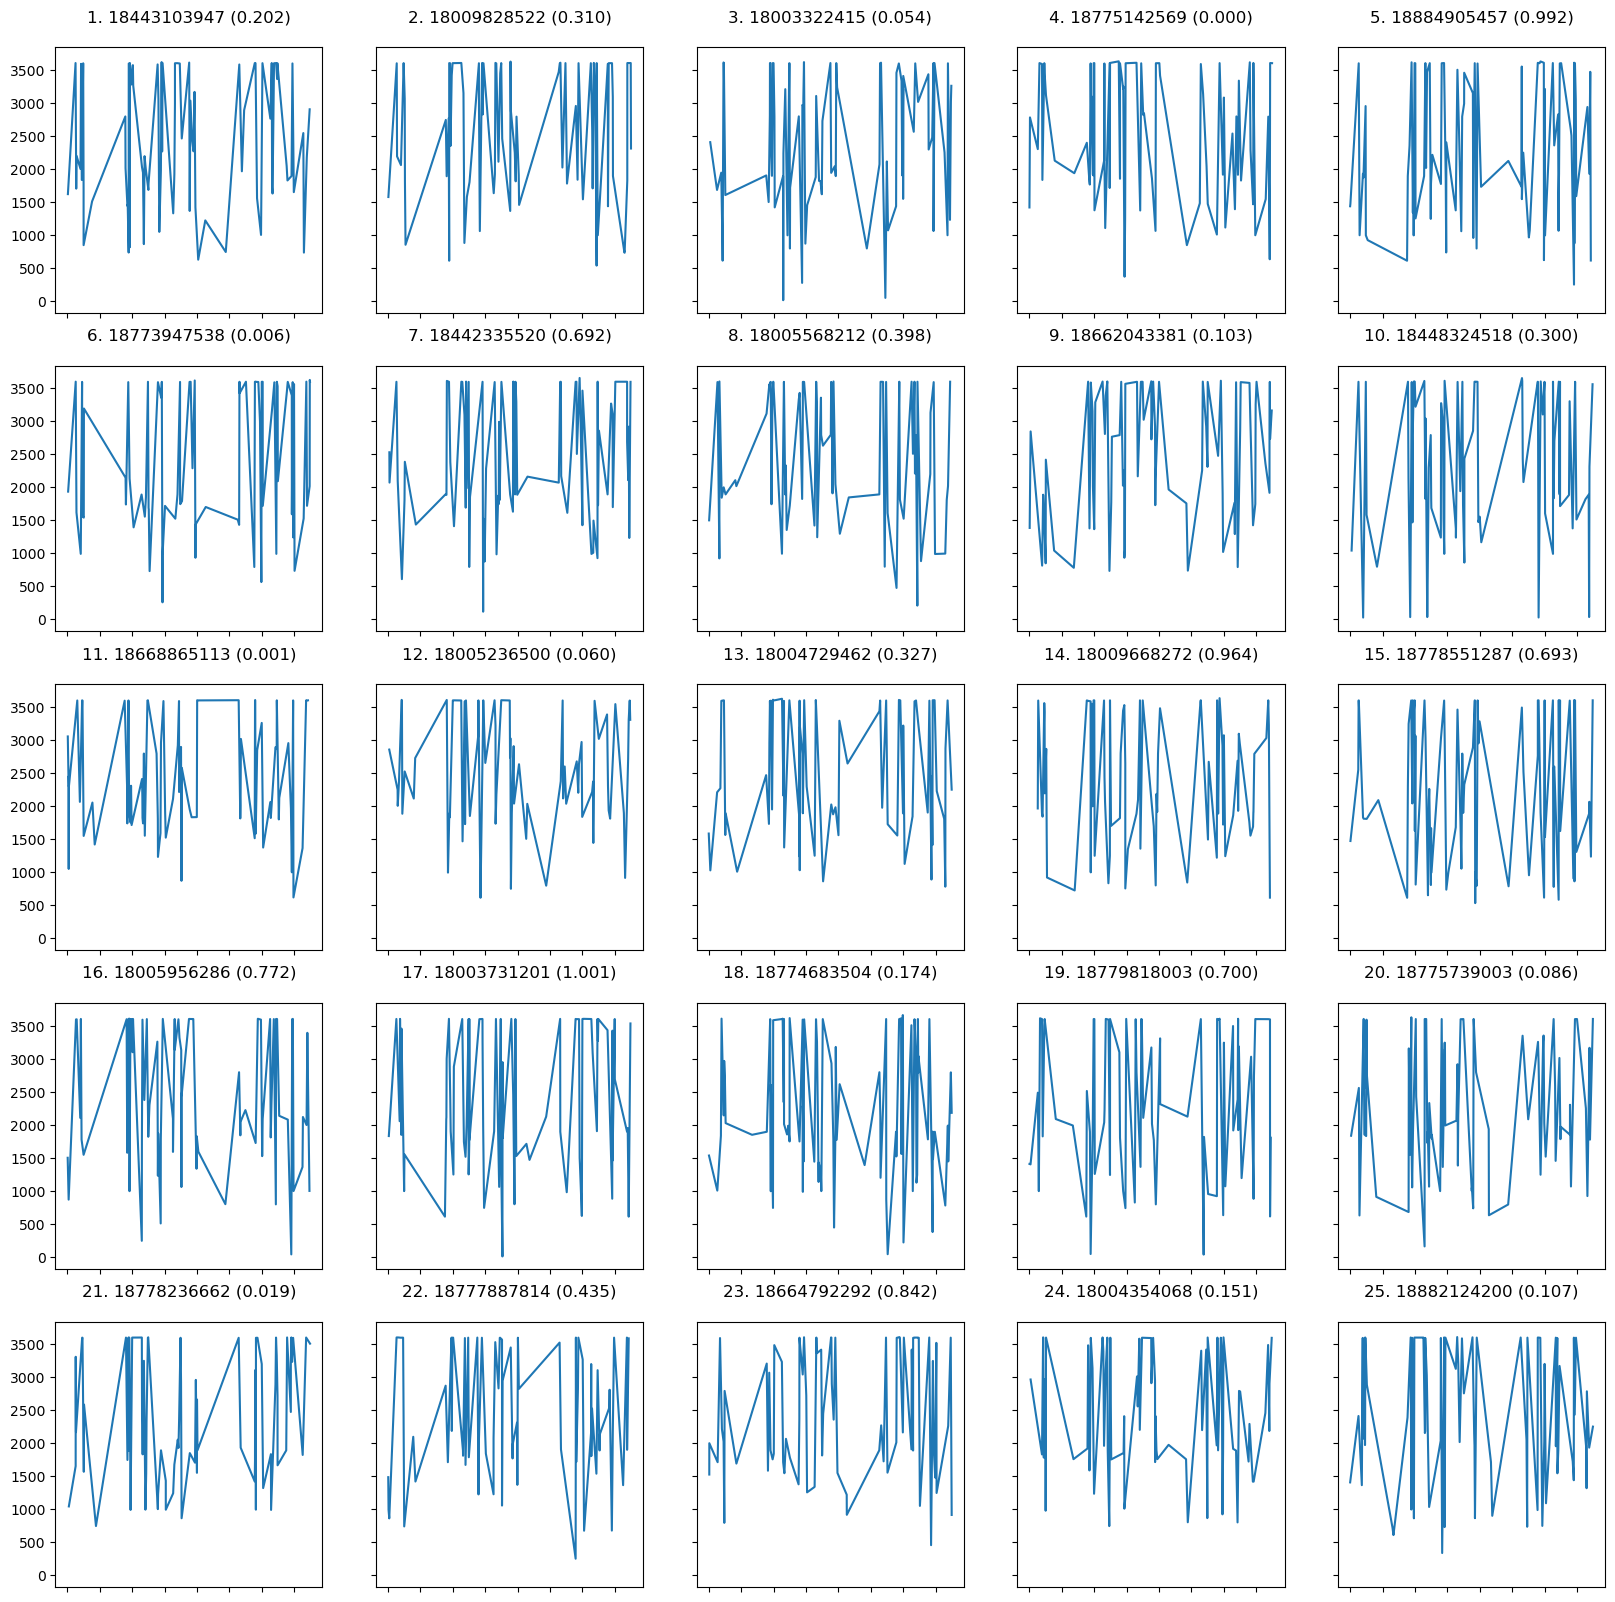

CPU times: user 7.45 s, sys: 506 ms, total: 7.95 s
Wall time: 12.1 s


In [79]:
%%time
indice = 0
plot_flat_ts(df, df_dest, ind=indice)

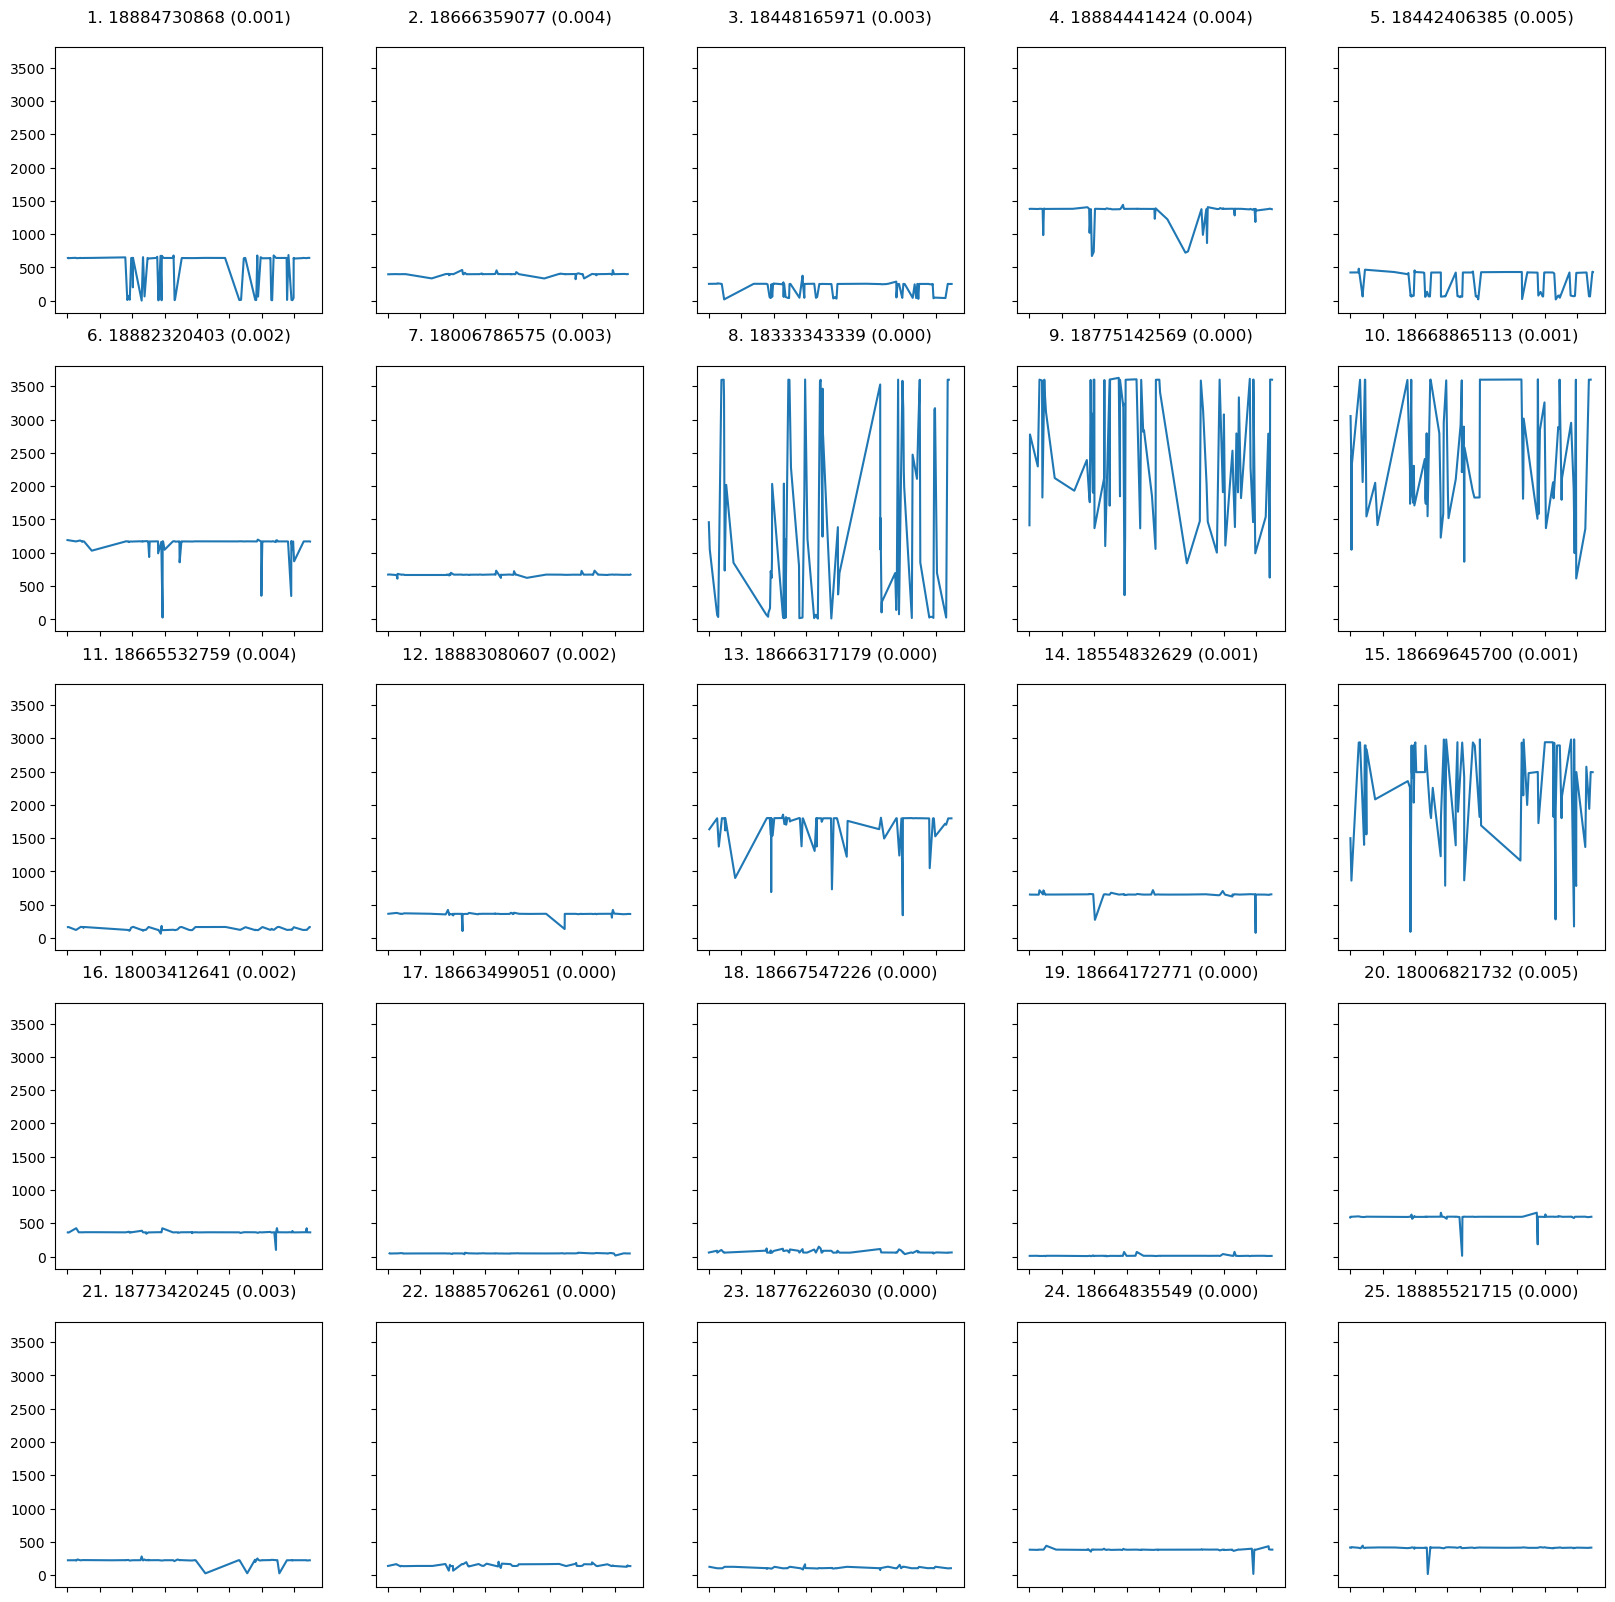

CPU times: user 6.45 s, sys: 147 ms, total: 6.6 s
Wall time: 7.7 s


In [80]:
%%time
plot_flat_ts(df, df_dest_flat, ind=indice)

In [81]:
index_lm[:20]

CategoricalIndex(['18884730868', '18666359077', '18448165971', '18884441424',
                  '18442406385', '18882320403', '18006786575', '18333343339',
                  '18775142569', '18668865113', '18665532759', '18883080607',
                  '18666317179', '18554832629', '18669645700', '18003412641',
                  '18663499051', '18667547226', '18664172771', '18006821732'],
                 categories=['18002001956', '18002002000', '18002002599', '18002002665', ..., '18889996569', '18889999101', '18889999353', '18889999520'], ordered=False, dtype='category', name='calledstation')

In [82]:
df_grafica = df[df.calledstation.isin(index_lm[i+indice*rows*cols:i+indice*rows*cols+rows*cols])]
df_grafica

,calledstation,real_sessiontime,bd,weekday,hour
starttime,,,,,
2023-09-15 00:00:57,18885706261,140,marcador2,4,0
2023-09-15 00:02:23,18775142569,1413,marcador2,4,0
2023-09-15 00:04:05,18885521715,416,marcador2,4,0
2023-09-15 00:04:52,18006821732,589,marcador3,4,0
2023-09-15 00:08:21,18006786575,673,marcador1,4,0
...,...,...,...,...,...
2023-09-29 23:40:19,18442406385,433,marcador3,4,23
2023-09-29 23:47:50,18003412641,365,marcador4,4,23
2023-09-29 23:51:56,18448165971,253,marcador4,4,23


#### Comportamiento de llamadas en el tiempo

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2190350 entries, 2023-09-15 00:00:00 to 2023-09-29 23:59:59
Data columns (total 5 columns):
 #   Column            Dtype   
---  ------            -----   
 0   calledstation     category
 1   real_sessiontime  int64   
 2   bd                category
 3   weekday           int32   
 4   hour              int32   
dtypes: category(2), int32(2), int64(1)
memory usage: 95.3 MB


<Axes: xlabel='hour'>

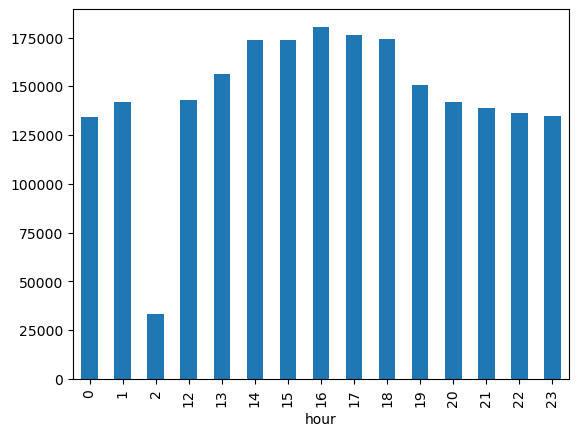

In [84]:
df.groupby('hour').count().calledstation.plot(kind='bar')

<Axes: xlabel='hour', ylabel='calledstation'>

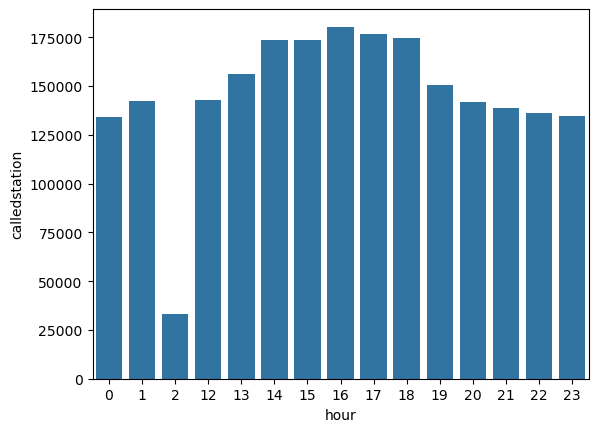

In [85]:
sns.barplot(data=df.groupby('hour').count(),
            x=df.groupby('hour').count().index,
            y='calledstation')

In [86]:
fig = px.bar(df.groupby('hour').count(), 
             x=df.groupby('hour').count().index, 
             y='calledstation')
fig.show()

<Axes: xlabel='weekday'>

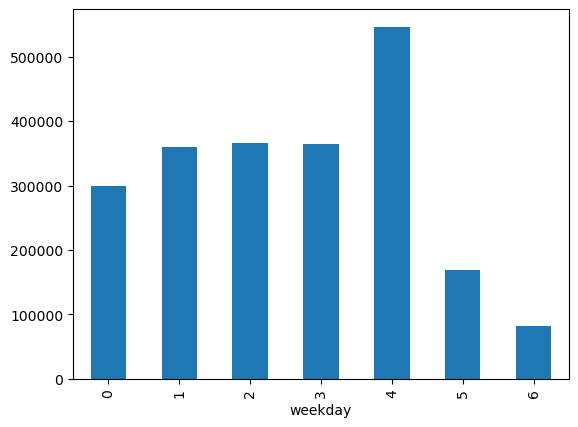

In [87]:
# lunes = 0, domingo = 6
df.groupby('weekday').count().calledstation.plot(kind='bar')

<Axes: xlabel='weekday', ylabel='calledstation'>

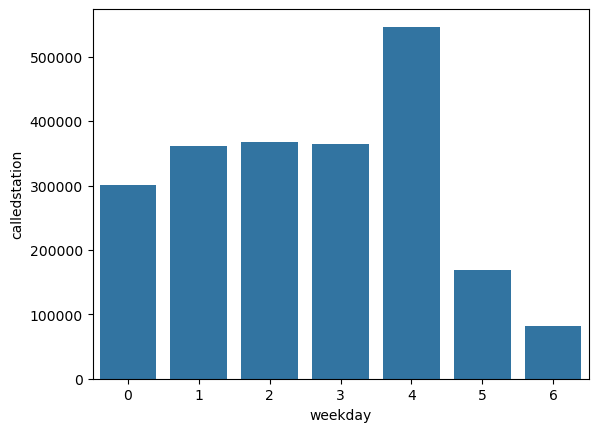

In [88]:
sns.barplot(data=df.groupby('weekday').count(),
            x=df.groupby('weekday').count().index,
            y='calledstation')

In [89]:
fig = px.bar(df.groupby('weekday').count(), 
             x=df.groupby('weekday').count().index, 
             y='calledstation')
fig.show()

#### Duración de llamadas en el tiempo

In [90]:
index_lm

CategoricalIndex(['18884730868', '18666359077', '18448165971', '18884441424',
                  '18442406385', '18882320403', '18006786575', '18333343339',
                  '18775142569', '18668865113',
                  ...
                  '18448743833', '18663937447', '18772197340', '18007154836',
                  '18663039675', '18447361549', '18667271694', '18554054996',
                  '18448634621', '18444786683'],
                 categories=['18002001956', '18002002000', '18002002599', '18002002665', ..., '18889996569', '18889999101', '18889999353', '18889999520'], ordered=False, dtype='category', name='calledstation', length=9230)

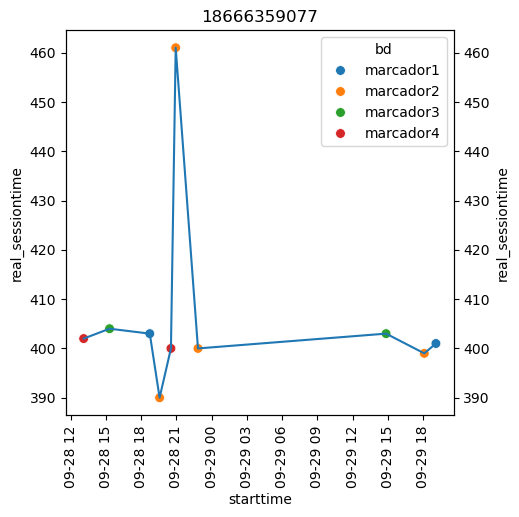

In [101]:
dest_num = '18666359077'
last_n=10

fix, ax1 = plt.subplots(figsize=(5,5))

plt.xticks(rotation='vertical')

sns.scatterplot(data = df[df.calledstation == dest_num].tail(last_n),
             x = df[df.calledstation == dest_num].tail(last_n).index,
             y = 'real_sessiontime',
             hue = 'bd',
             s=50,                         
             ax=ax1,
             )

ax2 = ax1.twinx()

sns.lineplot(data = df[df.calledstation == dest_num].tail(last_n),
             x = df[df.calledstation == dest_num].tail(last_n).index,
             y = 'real_sessiontime',
             ax=ax2,
             )

plt.title(f'{dest_num}')

plt.show()

In [102]:
df[df.calledstation == dest_num]

,calledstation,real_sessiontime,bd,weekday,hour
starttime,,,,,
2023-09-15 00:16:46,18666359077,398,marcador2,4,0
2023-09-15 12:17:27,18666359077,401,marcador4,4,12
2023-09-15 12:36:16,18666359077,400,marcador2,4,12
2023-09-15 18:18:05,18666359077,399,marcador1,4,18
2023-09-15 18:52:57,18666359077,400,marcador2,4,18
...,...,...,...,...,...
2023-09-28 20:56:01,18666359077,461,marcador2,3,20
2023-09-28 22:49:52,18666359077,400,marcador2,3,22
2023-09-29 14:51:36,18666359077,403,marcador3,4,14


In [103]:
low = len(df[df.calledstation == dest_num]) - 2
hi = len(df[df.calledstation == dest_num])
df[df.calledstation == dest_num].real_sessiontime.iloc[low:hi].std() / df[df.calledstation == dest_num].real_sessiontime.iloc[low:hi].mean()

0.0035355339059327377

#### Dispersión de duración de llamadas según frecuencia

In [105]:
df_dest

,real_sessiontime,num_llamadas,dur_prom,flat_ratio
calledstation,,,,
18443103947,198934,82,2426.024390,0.202349
18009828522,196620,76,2587.105263,0.310040
18003322415,191040,80,2388.000000,0.053881
18775142569,188852,76,2484.894737,0.000393
18884905457,187213,82,2283.085366,0.991719
...,...,...,...,...
18778142461,3,1,3.000000,NaN
18332893664,2,1,2.000000,NaN
18449861777,2,1,2.000000,NaN


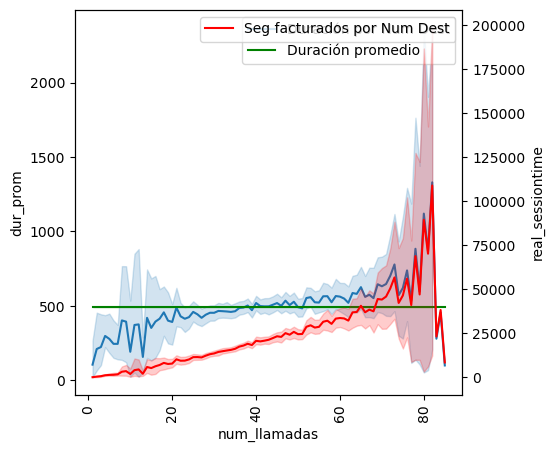

In [118]:
fix, ax1 = plt.subplots(figsize=(5,5))

plt.xticks(rotation='vertical')

sns.lineplot(data = df_dest,
             x = df_dest.num_llamadas,
             y = df_dest.dur_prom,
             errorbar=('ci', 100),
             label='Duración por Num Dest',
             ax=ax1,
             )

sns.lineplot(data = df_dest,
             x = df_dest.num_llamadas,
             y = df_dest.dur_prom.mean(),
             color='green',
             label='Duración promedio',
             ax=ax1,
             )

ax2 = ax1.twinx()

sns.lineplot(data = df_dest,
             x = df_dest.num_llamadas,
             y = df_dest.real_sessiontime,
             errorbar=('ci', 100),
             err_style='band',
             color='red',
             label='Seg facturados por Num Dest',
             ax=ax2,
             )


ax1.legend()
ax2.legend()
plt.show()


#### Frecuencia de número de llamadas

In [95]:
df_dest.num_llamadas.value_counts()

num_llamadas
39    1927
37    1920
34    1914
38    1908
35    1901
      ... 
80       6
82       6
83       1
84       1
85       1
Name: count, Length: 85, dtype: int64

<Axes: xlabel='num_llamadas'>

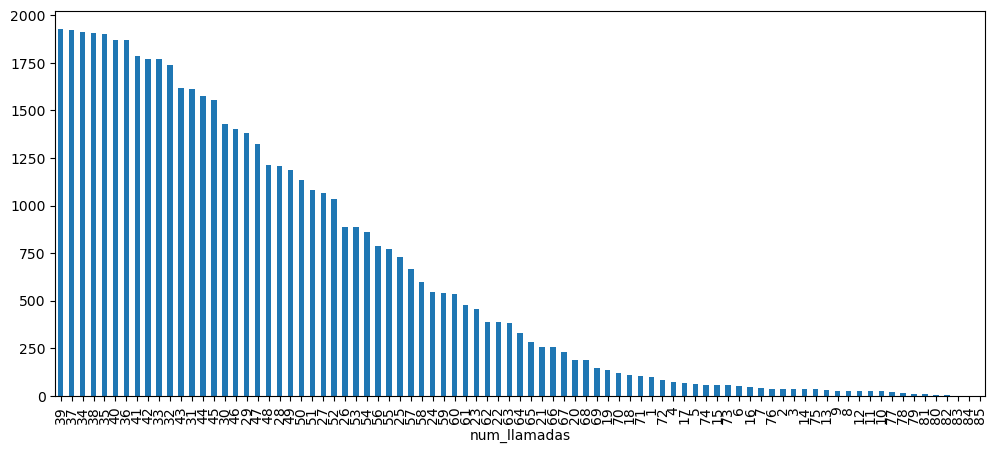

In [96]:
df_dest.num_llamadas.value_counts().plot(kind='bar', figsize=(12,5))

#### Histogramas

<Axes: >

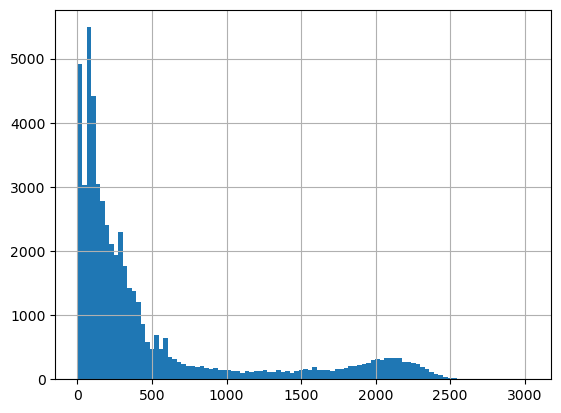

In [97]:
# por duraciones promedio
df_dest.dur_prom.hist(bins=100)

<Axes: >

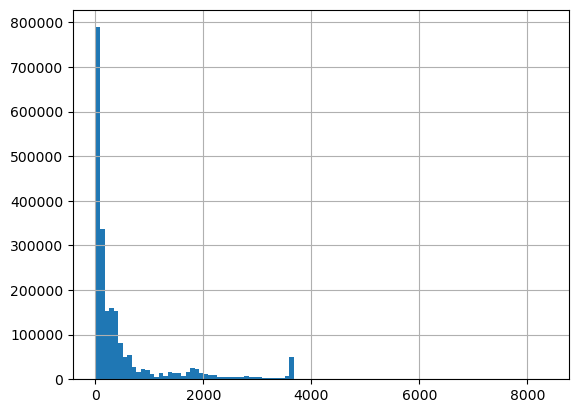

In [98]:
# por duraciones reales
df.real_sessiontime.hist(bins=100)